## Mobile Ads: Case Study

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Settings
plt.style.use("ggplot")

In [2]:
# Import Data
ads_data = pd.read_csv("../Data/MobileAds.csv")

print(ads_data.head())

   Unnamed: 0  m.impr_post  m.impr_pre  m.click_post  m.click_pre  \
0           1          255         155             3            3   
1           2           18        4900             1           41   
2           3          583        6858             2           46   
3           4        11498        3439           151           36   
4           5         1554        1549            28           34   

   m.cost_post  m.cost_pre  m.conv_post  m.conv_pre  m.value_post  ...  \
0       148.53       94.38            0           4           0.0  ...   
1         4.50      395.32            0           2           0.0  ...   
2         8.17      162.05            0           2           0.0  ...   
3       500.93      105.69           13           6         405.4  ...   
4        90.37       86.97            1           6           0.0  ...   

   d.cpm_pre  d.cpm_post  d.cpc_pre  d.cpc_post   d.cpa_pre  d.cpa_post  \
0   0.336804    0.479802  32.108667   31.972273  240.815000   78.

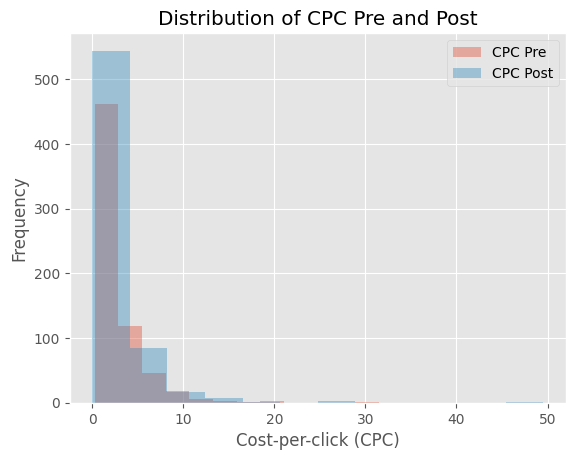

In [3]:
plt.hist(ads_data["m.cpc_pre"], bins=12, label="CPC Pre", alpha=0.4)
plt.hist(ads_data["m.cpc_post"], bins=12, label="CPC Post", alpha=0.4)
plt.title("Distribution of CPC Pre and Post")
plt.xlabel("Cost-per-click (CPC)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The distributions of the cost-per-clicks both appear geometric.

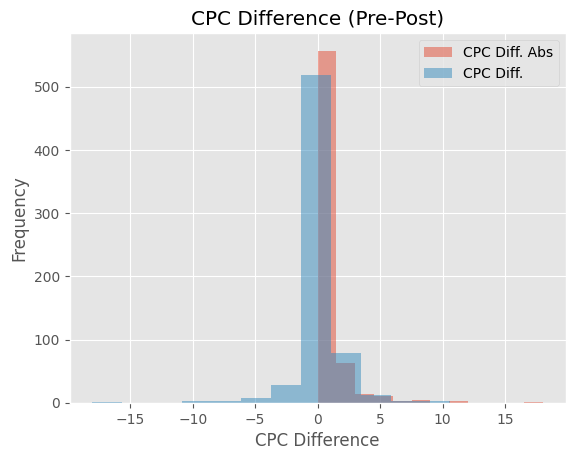

In [4]:
ads_data["cpc_diff_abs"] = abs(ads_data["m.cpc_pre"] - ads_data["m.cpc_post"])
ads_data["cpc_diff"]     = ads_data["m.cpc_pre"] - ads_data["m.cpc_post"]

plt.hist(ads_data["cpc_diff_abs"], bins=12, label="CPC Diff. Abs", alpha=0.5)
plt.hist(ads_data["cpc_diff"], bins=12, label="CPC Diff.", alpha=0.5)
plt.title("CPC Difference (Pre-Post)")
plt.xlabel("CPC Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

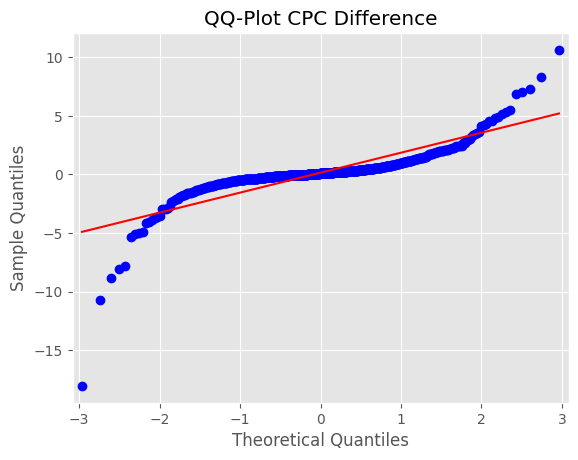

In [10]:
sm.qqplot(ads_data["cpc_diff"], line="s", markerfacecolor="blue", markeredgecolor="blue")
plt.title("QQ-Plot CPC Difference")
plt.show()

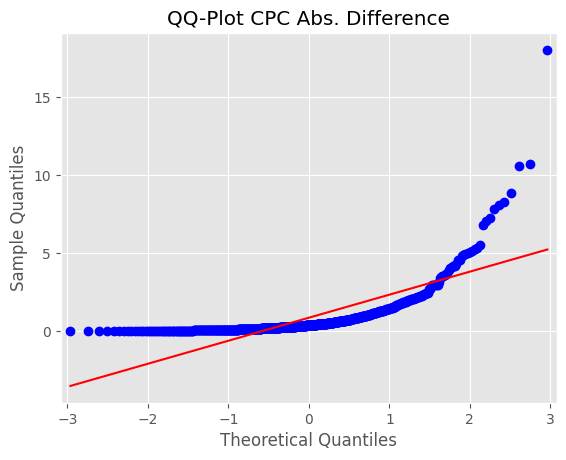

In [11]:
sm.qqplot(ads_data["cpc_diff_abs"], line="s", markerfacecolor="blue", markeredgecolor="blue")
plt.title("QQ-Plot CPC Abs. Difference")
plt.show()

The section above computed both the standard and absolute difference between the pre and post cost-per-click series. The absolute difference appears to maintain a geometric distribution, like the original pre and post CPC series. The standard distance of the CPC series is bell-shaped with a high peak and heavy tails. 